## Tissues, cells and cell lines clustering depending on chromatin accessibility matrix

**jupytr Notebook sections:**
1. Import libraries
2. Sparse matrix loading
3. Data preprocessing:  
     * Conversion to dense matrix
     * Normalization
     * Standard scaling
4. Dimensionality reduction (using PCA)
5. Selection the best number of clusters (depending on Silhouette score)
6. Build k-means clustering model
7. Visulisation of k-means clusters (using TSNE)
7. Annotation of k-mean clusters (using meta data)
8. Subclustering of impure clusters using hierarchical clustering
9. Visulisation of clusters and subclusters (using TSNE)
10. annotation of all clusters
8. Build hierarchical clustering model
7. Visulisation of hierarchical clusters (using TSNE)
9. Annotation of hierarchical clusters (using meta data)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

### Sparse matrix loading

In [2]:
sparse_mat = sparse.load_npz("/Users/RobotComp.ru/Downloads/sparse_matrix.npz")
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_mat)
sparse_mat.shape

(44835, 4025)

In [3]:
sparse_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024
0,3.201481,3.995952,3.740148,3.539847,2.243123,0.743659,3.102468,3.272795,2.510277,2.732929,...,0.743659,0.743659,2.226718,3.040173,1.945072,0.743659,2.699374,0.743659,2.577362,0.743659
1,6.835551,6.679160,6.798613,6.268808,6.565679,6.538792,6.681923,6.286932,7.500325,6.838782,...,5.850362,7.037398,6.015883,5.302401,5.835148,6.215881,5.720919,5.865190,5.771977,6.416984
2,4.572531,0.743659,5.095395,4.392446,4.581932,5.035403,4.074422,4.260210,3.043638,2.398688,...,2.709714,5.298374,5.001042,4.790338,3.927111,4.282410,4.842508,5.623824,5.457362,0.743659
3,4.326608,2.760289,4.285668,3.475241,4.335953,4.166842,4.490751,3.427252,2.577140,2.248247,...,2.612118,0.743659,3.515558,3.795588,2.828591,0.743659,3.454470,4.669818,4.383335,0.743659
4,6.015103,6.217770,5.086893,5.047143,6.256222,4.898109,5.803596,4.358414,5.432979,5.012650,...,0.743659,0.743659,2.723486,2.970481,2.176174,0.743659,2.179384,3.073035,3.876111,0.743659


### Data preprocessing

In [4]:
dense_mat = sparse_mat.toarray().T
dense_mat.shape

(4025, 44835)

In [5]:
normal = Normalizer()
normalized_mat = normal.fit_transform(dense_mat)

In [6]:
normalized_mat

array([[0.00484496, 0.01034457, 0.00691983, ..., 0.00524891, 0.00112542,
        0.00348923],
       [0.00696227, 0.01163731, 0.0012957 , ..., 0.00492453, 0.0012957 ,
        0.0012957 ],
       [0.00626724, 0.01139221, 0.00853818, ..., 0.00339966, 0.00483572,
        0.00348324],
       ...,
       [0.00128399, 0.01012671, 0.00970997, ..., 0.00128399, 0.00128399,
        0.00128399],
       [0.00434743, 0.00973602, 0.00920533, ..., 0.0053582 , 0.00125438,
        0.00125438],
       [0.00197549, 0.01704636, 0.00197549, ..., 0.00197549, 0.00197549,
        0.00197549]])

In [7]:
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(normalized_mat)

In [8]:
scaled_matrix

array([[ 0.63069936, -0.31622379,  0.1369052 , ...,  0.60025904,
        -0.91201162,  0.78255673],
       [ 1.87198877,  0.24686639, -1.46537493, ...,  0.44529879,
        -0.80214722, -0.66636118],
       [ 1.46452274,  0.14010576,  0.59796383, ..., -0.28313767,
         1.48179127,  0.77859643],
       ...,
       [-1.45693865, -0.41111702,  0.93179907, ..., -1.29380867,
        -0.8097055 , -0.67409945],
       [ 0.33901973, -0.58129436,  0.78803019, ...,  0.65246743,
        -0.82880363, -0.69365238],
       [-1.05154094,  2.60292269, -1.27170741, ..., -0.96347354,
        -0.36356366, -0.21733322]])

### Dimensionality reduction (using PCA)

In [9]:
pca = PCA()
pca.fit(scaled_matrix) 

PCA()

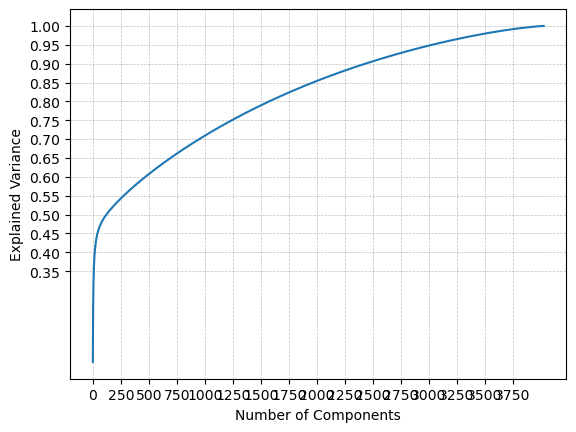

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(0, 4000, 250))
plt.yticks(np.arange(0.35, 1.01, 0.05))
plt.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

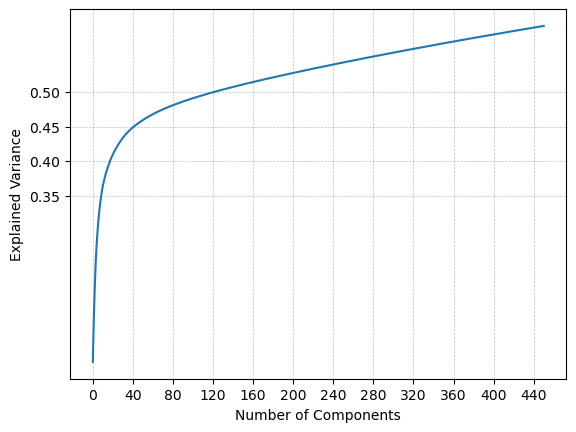

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:451])
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(0, 451, 40))
plt.yticks(np.arange(0.35, 0.51, 0.05))
plt.grid(linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

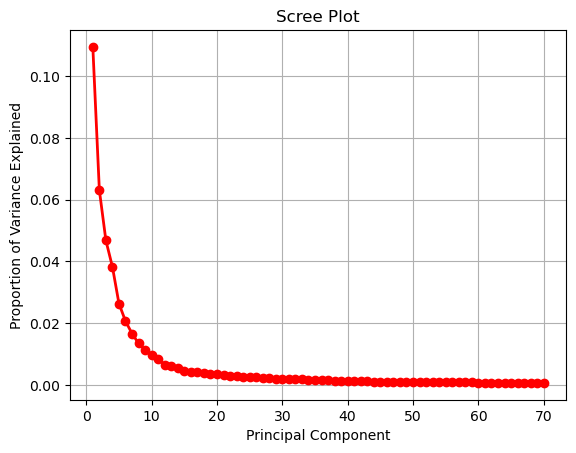

In [12]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values[: 70], pca.explained_variance_ratio_[:70], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

**depending on the 3 previous plots, I chose 40 as the number of PCs**

In [13]:
# Apply PCA to the scaled matrix
n_components = 40 
pca = PCA(n_components=n_components)
reduced_matrix = pca.fit_transform(scaled_matrix)

In [14]:
reduced_matrix.shape

(4025, 40)

### Selection of the best number of clusters to use in both k-means and hierarchical clustering algorithms depending on Silhouette score and silhouette score per-sample

**1. K-means**

In [15]:
min_clusters = 2
max_clusters = 35

sil_score_kmeans = list()
problematic_samples_count = list()
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(reduced_matrix)
    silhouette_avg = silhouette_score(reduced_matrix, cluster_labels)
    sil_score_kmeans.append(silhouette_avg)
    sample_silhouette_scores = silhouette_samples(reduced_matrix, cluster_labels)
    problematic_samples = reduced_matrix[sample_silhouette_scores < 0.2]
    problematic_samples_count.append(len(problematic_samples))

In [16]:
indices = sorted(range(len(sil_score_kmeans)), key=lambda i: sil_score_kmeans[i], reverse=True)[:10]

largest_sil_scores = [sil_score_kmeans[i] for i in indices]
corresponding_problematic_count = [problematic_samples_count[i] for i in indices]
print("The 10 largest silhouette scores in k-means clustering are:", largest_sil_scores)
print("Their corresponding problematic samples counts depending on silhouette scores per-sample in k-means clustering are:", 
      corresponding_problematic_count, sep='\n')
print("Their indices (number of corresponding clusters) are:", [i + 2 for i in indices])

The 10 largest silhouette scores in k-means clustering are: [0.3862859006436616, 0.3799021448598442, 0.36883855001531823, 0.3551874010296583, 0.35096616102429684, 0.3489482831221744, 0.34715195641228913, 0.34108840939896695, 0.33914838607217723, 0.33285756038742303]
Their corresponding problematic samples counts depending on silhouette scores per-sample in k-means clustering are:
[818, 844, 980, 962, 909, 1062, 1099, 1142, 1233, 1144]
Their indices (number of corresponding clusters) are: [9, 11, 8, 19, 7, 29, 17, 28, 6, 34]


**2. Hierarchical clustering**

In [17]:
min_clusters = 2
max_clusters = 35

sil_score_hc = list()
problematic_samples_count = list()
for n_clusters in range(min_clusters, max_clusters + 1):
    hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
    cluster_labels = hc.fit_predict(reduced_matrix)
    silhouette_avg = silhouette_score(reduced_matrix, cluster_labels)
    sil_score_hc.append(silhouette_avg)
    sample_silhouette_scores = silhouette_samples(reduced_matrix, cluster_labels)
    problematic_samples = reduced_matrix[sample_silhouette_scores < 0.2]
    problematic_samples_count.append(len(problematic_samples))

In [18]:
indices = sorted(range(len(sil_score_hc)), key=lambda i: sil_score_hc[i], reverse=True)[:10]

largest_sil_scores = [sil_score_hc[i] for i in indices]
corresponding_problematic_count = [problematic_samples_count[i] for i in indices]
print("The 10 largest silhouette scores in hierarchical clustering are:", largest_sil_scores)
print("Their corresponding problematic samples counts depending on silhouette scores per-sample in k-means clustering are:", 
      corresponding_problematic_count, sep='\n')
print("Their indices (number of corresponding clusters) are:", [i + 2 for i in indices])

The 10 largest silhouette scores in hierarchical clustering are: [0.3739839691819992, 0.3654472861462719, 0.36432951278344217, 0.3494154986248405, 0.3459443009821638, 0.33965581173570464, 0.3331460298535697, 0.3316033755027244, 0.33080245176412415, 0.32937187140176444]
Their corresponding problematic samples counts depending on silhouette scores per-sample in k-means clustering are:
[938, 914, 933, 1099, 1087, 1040, 965, 1032, 993, 1116]
Their indices (number of corresponding clusters) are: [11, 9, 10, 8, 18, 17, 15, 16, 7, 35]


**_Note:_ as we've seen before the best number of clusters (depending on silhouette score and silhouette score per-sample) in K-means and Hierarchical clustering algorithms is 9**

### Build K-means model

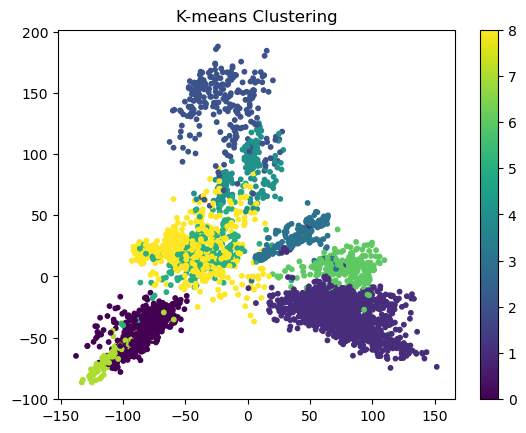

In [19]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(reduced_matrix)

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

### Visulisation of k-means clusters (using TSNE)

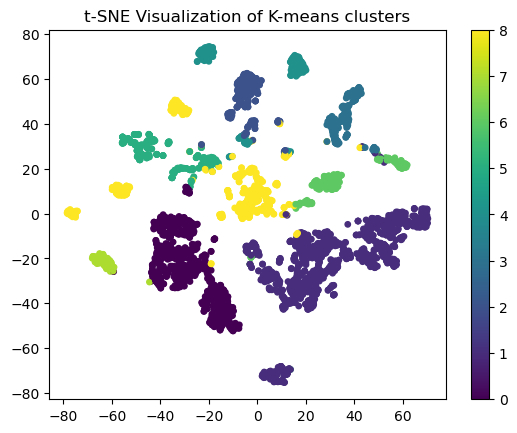

In [20]:
tsne_reducer = TSNE(n_components=2, random_state=42)
tsne_data = tsne_reducer.fit_transform(reduced_matrix)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', s=15)
plt.title('t-SNE Visualization of K-means clusters')
plt.colorbar()
plt.show()

### Annotation of K-means clusters

In [21]:
# read metadata file
meta = pd.read_csv("/Users/RobotComp.ru/Downloads/meta.tsv", sep='\t')
meta.head()

,Annotation
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [22]:
# labels in meta data
true_labels = meta['Annotation'].values
true_labels = true_labels.astype(str)
true_labels

array(['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan'], dtype='<U31')

#### store original indices of each cluster (resulted from k-means clustering algorithm) to comapre it later with meta data

In [23]:
cluster_indices_kmeans = {i: [] for i in range(n_clusters)}

for i, label in enumerate(cluster_labels):
    cluster_indices_kmeans[label].append(i)

In [24]:
cluster_indices_kmeans

{0: [185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  269,
  270,
  271,
  272,
  273,
  274,
  275,
  276,
  277,
  278,
  279,
  280,
  281,
  282,
  283,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  294,
  295,
  296,
  297,
  298,
  299,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  347,
  349,
  350,
  351,
  3

**creation of a dictionary 'annotated_clusters_kmeans' which contains 10 keys (clusters resulted from k-means clustering algorithm), we will assign values to each key depending on tissues or cells names in each resulted clusters compared to metadata**

In [25]:
annotated_clusters_kmeans = { i: [] for i in range(n_clusters) }
annotated_clusters_kmeans

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

**creation of a dictionary 'meta_groups' which contains all the distinct labels in meta data as keys and values as empty lists**

In [26]:
meta_groups = {i:[] for i in true_labels}
meta_groups

{'nan': [],
 'Myeloid leukemia (K562)': [],
 'CD4+ T-cell': [],
 'Myeloid progenitor': [],
 'Hepatic': [],
 'Brain Anterior caudate': [],
 'Brain Posterior cingulate gyrus': [],
 'Brain (Cerebellar)': [],
 'Brain Substantia nigra': [],
 'Brain Caudate nucleus': [],
 'Brain Amygdala': [],
 'Brain Nucleus accumbens': [],
 'Brain Frontal cortex': [],
 'Brain Hippocampus': [],
 'Brain Hypothalamus': [],
 'Brain Anterior cingulate cortex': [],
 'Brain Putamen': [],
 'Digestive': [],
 'Lung cancer cell line': [],
 'Thyroid gland': [],
 'Myeloid leukemia': [],
 'MCF-7': [],
 'T47D': [],
 'Pluripotent/Pluripotent-derived': [],
 'Renal cell carcinoma': [],
 'Kidney': [],
 'Pancreas': [],
 'Monocyte': [],
 'M2 macrophage': [],
 'M1 macrophage': [],
 'Spinal cord': [],
 'Colon cancer cell line': [],
 'CD8+ T-cell': [],
 'NK cell': [],
 'CD19+ B-cell': [],
 'Activated CD3+ T-cell': [],
 'Activated CD8+ T-cell': [],
 'Activated CD4+ T-cell': [],
 'CD3+ T-cell': [],
 'Fetal life support': [],
 'Fibr

**Assign the original indices of each tissue or cell name in metadata file (indices are the same as in sparse_matrix file) to its corresponding key (label of group in metadata file) and then delete the Null values key** 

In [27]:
for i in range(4025):
    for key, value in meta_groups.items():
        if true_labels[i] == key:
            meta_groups[key] += [i]
del meta_groups['nan']
meta_groups

{'Myeloid leukemia (K562)': [13,
  14,
  18,
  21,
  23,
  50,
  75,
  84,
  88,
  104,
  113,
  116,
  124,
  125,
  130,
  134,
  148,
  160,
  1269,
  2325,
  2507,
  2725,
  2817,
  2819],
 'CD4+ T-cell': [168,
  1297,
  1302,
  1305,
  1309,
  1312,
  1339,
  1348,
  1349,
  1353,
  1425,
  1428,
  1438,
  1443,
  1480,
  1500,
  1517,
  1518,
  1522,
  1538,
  1539,
  1575,
  1579,
  1580,
  1588,
  1591,
  1599,
  1606,
  1608,
  1661,
  1662,
  1670,
  1673,
  1681,
  1682,
  1685,
  1998,
  2182,
  2225,
  2228,
  2350,
  2372,
  2777,
  2780,
  2783,
  2792,
  2796,
  2797,
  2798,
  2800,
  2972,
  2988,
  2994,
  3122,
  3127,
  3223,
  3238,
  3242,
  3257,
  3263,
  3275,
  3288,
  3301,
  3319,
  3320,
  3349,
  3371,
  3377,
  3395,
  3423,
  3424,
  3429,
  3439,
  3440,
  3443,
  3451,
  3453,
  3461,
  3463,
  3464,
  3465,
  3470,
  3471,
  3472,
  3473,
  3474,
  3480,
  3486,
  3491,
  3495,
  3499,
  3507],
 'Myeloid progenitor': [175, 176, 1715, 1716, 1722, 2371

**Compare the meta_groups indices with indices of each cluster resulted from k-means algorithm to annotate the clusters depending on meta data**

In [28]:
for key in meta_groups.keys():
    for i in range(n_clusters):
        if set(meta_groups[key]).issubset(set(cluster_indices_kmeans[i])):
            annotated_clusters_kmeans[i] += [key]
        else:
            freq = 0
            for j in meta_groups[key]:
                if j in cluster_indices_kmeans[i]:
                    freq += 1
            if freq > 0.6 * len(meta_groups[key]):
                annotated_clusters_kmeans[i] += [key]

**The resulted annotated_clusters_kmeans is a dictionary contains 10 keys (number of resulted clusters from k-means clustering algorithm) and the value in each key (cluster) is a list of the names of tissues/cells/cell_lines in each resulted cluster**

In [29]:
for cluster, label in annotated_clusters_kmeans.items():
    print("The names of tissues/cells/cell_lines in the cluster number {0} are {1}".format(cluster, label), '\n')

The names of tissues/cells/cell_lines in the cluster number 0 are ['Brain Anterior caudate', 'Brain Posterior cingulate gyrus', 'Brain Substantia nigra', 'Brain Caudate nucleus', 'Brain Amygdala', 'Brain Nucleus accumbens', 'Brain Frontal cortex', 'Brain Hippocampus', 'Brain Hypothalamus', 'Brain Anterior cingulate cortex', 'Brain Putamen', 'Spinal cord', 'Brain Occipital lobe', 'Brain Midbrain', 'Brain Globus pallidus', 'Fetal brain'] 

The names of tissues/cells/cell_lines in the cluster number 1 are ['CD4+ T-cell', 'CD8+ T-cell', 'NK cell', 'CD19+ B-cell', 'Activated CD3+ T-cell', 'Activated CD8+ T-cell', 'Activated CD4+ T-cell', 'CD3+ T-cell', 'T-cell leukemia', 'Myeloma cell line', 'B-cell lymphoma', 'Fetal thymus', 'CD20+ B-cell', 'Lymphoblastoid cell line'] 

The names of tissues/cells/cell_lines in the cluster number 2 are ['Renal cell carcinoma', 'Kidney', 'Fibroblast', 'Myocyte', 'Neurovascular', 'Osteosarcoma', 'Myoblast', 'Epithelial', 'Epithelial (Eye)', 'Adenocarcinoma'] 

**As we've seen in the previous clusters, all clusters contents make sense _except clusters numbers 2 and 8_ so in the next step I will try to subdivide these clusters into subclusters, to do that I will use hierarchical clustering algorithm.**

## Subdivision of impure clusters (2 & 8)

In [30]:
clus_7_indices = cluster_indices_kmeans[8]
clus_2_indices = cluster_indices_kmeans[2]

In [31]:
clus_7_data = reduced_matrix[clus_7_indices]
clus_2_data = reduced_matrix[clus_2_indices]

#### Selection the best number of clusters to subdivide clusters 2 and 8

In [32]:
min_clusters = 2
max_clusters = 10

sil_score_hc_7 = list()
sil_score_hc_2 = list()
problematic_samples_count_7 = list()
problematic_samples_count_2 = list()
print("Selection the best number of clusters to divide cluster number 7")
for n_clusters in range(min_clusters, max_clusters + 1):
    hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
    cluster_labels_7 = hc.fit_predict(clus_7_data)
    silhouette_avg = silhouette_score(clus_7_data, cluster_labels_7)
    sil_score_hc_7.append(silhouette_avg)
    sample_silhouette_scores = silhouette_samples(clus_7_data, cluster_labels_7)
    problematic_samples = clus_7_data[sample_silhouette_scores < 0.2]
    problematic_samples_count_7.append(len(problematic_samples))
    print('{} clusters, the silhouette score is {}, and number of problematic samples is {}:'.format(n_clusters,silhouette_avg,
                                                                                                 len(problematic_samples)))
print()
print("Selection the best number of clusters to divide cluster number 2")
for n_clusters in range(min_clusters, max_clusters + 1):
    hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
    cluster_labels_2 = hc.fit_predict(clus_2_data)
    silhouette_avg = silhouette_score(clus_2_data, cluster_labels_2)
    sil_score_hc_2.append(silhouette_avg)
    sample_silhouette_scores = silhouette_samples(clus_2_data, cluster_labels_2)
    problematic_samples = clus_2_data[sample_silhouette_scores < 0.2]
    problematic_samples_count_2.append(len(problematic_samples))
    print('For number of clusters {}, the silhouette score is {}'.format(n_clusters, silhouette_avg))

Selection the best number of clusters to divide cluster number 7
2 clusters, the silhouette score is 0.21885966934195258, and number of problematic samples is 194:
3 clusters, the silhouette score is 0.25222865401422906, and number of problematic samples is 253:
4 clusters, the silhouette score is 0.3000684199204636, and number of problematic samples is 241:
5 clusters, the silhouette score is 0.28880379914226173, and number of problematic samples is 293:
6 clusters, the silhouette score is 0.3273649749559487, and number of problematic samples is 290:
7 clusters, the silhouette score is 0.3444395861831109, and number of problematic samples is 266:
8 clusters, the silhouette score is 0.36540257141962423, and number of problematic samples is 233:
9 clusters, the silhouette score is 0.37751727063290413, and number of problematic samples is 222:
10 clusters, the silhouette score is 0.38353356210860917, and number of problematic samples is 211:

Selection the best number of clusters to divi

**Subclustering cluster number 7 to 4 subclusters using hierarchical clustering**

In [62]:
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc_7 = hc.fit_predict(clus_7_data)

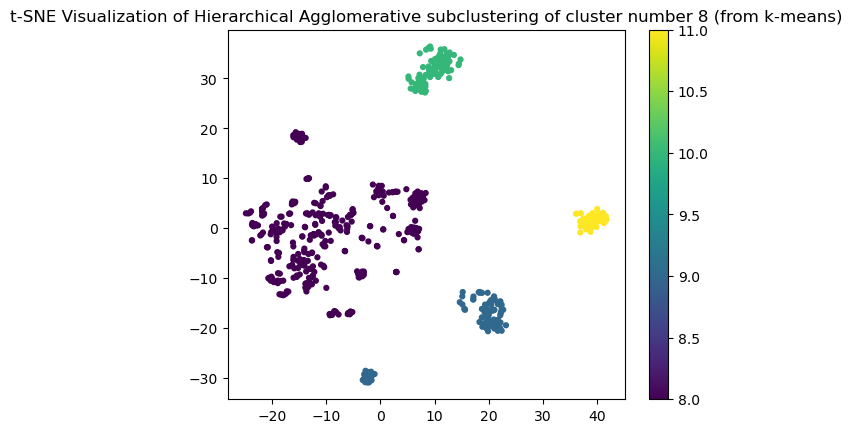

In [91]:
tsne = TSNE(n_components=2, random_state=42)

clustered_data_tsne = tsne.fit_transform(clus_7_data)

plt.scatter(clustered_data_tsne[:, 0], clustered_data_tsne[:, 1], c=y_hc_7, s=12, cmap='viridis')
plt.title('t-SNE Visualization of Hierarchical Agglomerative subclustering of cluster number 8 (from k-means)')
plt.colorbar()
plt.show()

In [35]:
n_clusters = 4
cluster_indices_hc_7 = {i: [] for i in range(n_clusters)}

for idx, label in enumerate(y_hc_7):
    cluster_indices_hc_7[label].append(clus_7_indices[idx])

In [36]:
annotated_clusters_hc_7 = { i: [] for i in range(n_clusters) }
annotated_clusters_hc_7

{0: [], 1: [], 2: [], 3: []}

In [37]:
for key in meta_groups.keys():
    for i in range(n_clusters):
        if set(meta_groups[key]).issubset(set(cluster_indices_hc_7[i])):
            annotated_clusters_hc_7[i] += [key]
        else:
            freq = 0
            for j in meta_groups[key]:
                if j in cluster_indices_hc_7[i]:
                    freq += 1
            if freq > 0.9 * len(meta_groups[key]):
                annotated_clusters_hc_7[i] += [key]

### Here are the annotation of subclusters of cluster 8 

In [38]:
annotated_clusters_hc_7

{0: ['Digestive',
  'Thyroid gland',
  'Pancreas',
  'Heart',
  'Adrenal gland',
  'Ovary'],
 1: ['Fetal muscle', 'Fetal heart'],
 2: ['Fetal kidney'],
 3: ['Lung']}

**Subclustering cluster number 2 to 3 subclusters using hierarchical clustering**

In [47]:
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc_2 = hc.fit_predict(clus_2_data)

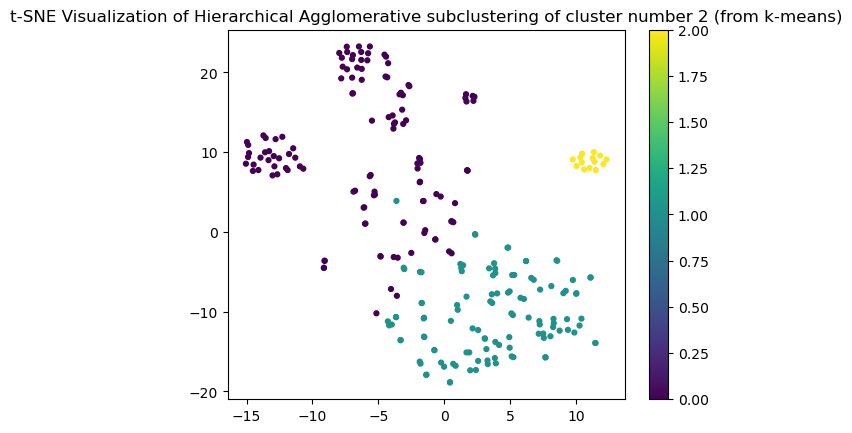

In [48]:
tsne = TSNE(n_components=2, random_state=42)

clustered_data_tsne = tsne.fit_transform(clus_2_data)

plt.scatter(clustered_data_tsne[:, 0], clustered_data_tsne[:, 1], c=y_hc_2, s=12, cmap='viridis')
plt.title('t-SNE Visualization of Hierarchical Agglomerative subclustering of cluster number 2 (from k-means)')
plt.colorbar()
plt.show()

In [49]:
n_clusters = 3
cluster_indices_hc_2 = {i: [] for i in range(n_clusters)}

for idx, label in enumerate(y_hc_2):
    cluster_indices_hc_2[label].append(clus_2_indices[idx])

In [50]:
annotated_clusters_hc_2 = { i: [] for i in range(n_clusters) }
annotated_clusters_hc_2

{0: [], 1: [], 2: []}

In [51]:
for key in meta_groups.keys():
    for i in range(n_clusters):
        if set(meta_groups[key]).issubset(set(cluster_indices_hc_2[i])):
            annotated_clusters_hc_2[i] += [key]
        else:
            freq = 0
            for j in meta_groups[key]:
                if j in cluster_indices_hc_2[i]:
                    freq += 1
            if freq > 0.55 * len(meta_groups[key]):
                annotated_clusters_hc_2[i] += [key]

### Here are the annotation of subclusters of cluster 2

In [52]:
annotated_clusters_hc_2

{0: ['Renal cell carcinoma',
  'Kidney',
  'Neurovascular',
  'Osteosarcoma',
  'Epithelial',
  'Epithelial (Eye)',
  'Adenocarcinoma'],
 1: ['Fibroblast', 'Myoblast'],
 2: ['Endothelial']}

### Combination of all clusters in one TSNE plot

In [63]:
y_hc_7[y_hc_7 == 0] = 8
y_hc_7[y_hc_7 == 1] = 9
y_hc_7[y_hc_7 == 2] = 10
y_hc_7[y_hc_7 == 3] = 11

y_hc_2[y_hc_2 == 1] = 12
y_hc_2[y_hc_2 == 2] = 13
y_hc_2[y_hc_2 == 0] = 2

In [54]:
comb_cluster_labels = cluster_labels.copy()

In [64]:
for i, idx in enumerate(clus_7_indices):
    comb_cluster_labels[idx] = y_hc_7[i]

In [65]:
for i, idx in enumerate(clus_2_indices):
    comb_cluster_labels[idx] = y_hc_2[i]

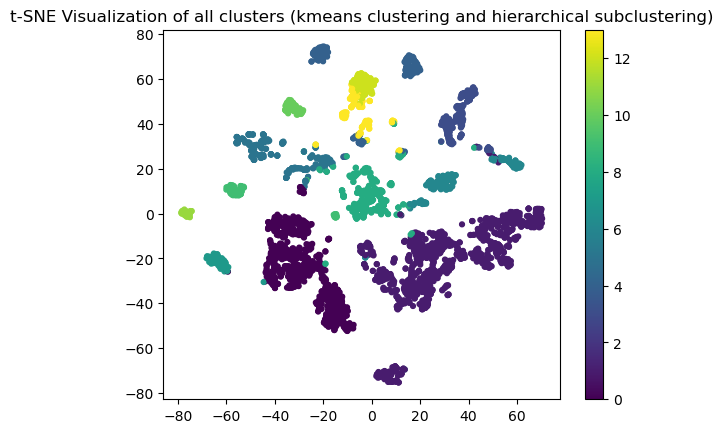

In [66]:
tsne = TSNE(n_components=2, random_state=42)

clustered_data_tsne = tsne.fit_transform(reduced_matrix)

plt.scatter(clustered_data_tsne[:, 0], clustered_data_tsne[:, 1], c=comb_cluster_labels, s=12, cmap='viridis')
plt.title('t-SNE Visualization of all clusters (kmeans clustering and hierarchical subclustering)')
plt.colorbar()
plt.show()

## In the first part I used k-means clustering algorithm to cluster the data into 9 clusters then I used hierarchical clustering to sub-cluster clusters number 2 (in 3 subclusters) and 8 (in 4 subclusters), so all in all the data has been clustered into 14 clusters and thier contents are as the following:

In [67]:
n_clusters = 14
all_clusters_indices = {i: [] for i in range(n_clusters)}

for i, label in enumerate(comb_cluster_labels):
    all_clusters_indices[label].append(i)

annotated_clusters = { i: [] for i in range(n_clusters) }

for key in meta_groups.keys():
    for i in range(n_clusters):
        if set(meta_groups[key]).issubset(set(all_clusters_indices[i])):
            annotated_clusters[i] += [key]
        else:
            freq = 0
            for j in meta_groups[key]:
                if j in all_clusters_indices[i]:
                    freq += 1
            if freq > 0.55 * len(meta_groups[key]):
                annotated_clusters[i] += [key]

In [68]:
annotated_clusters

{0: ['Brain Anterior caudate',
  'Brain Posterior cingulate gyrus',
  'Brain Substantia nigra',
  'Brain Caudate nucleus',
  'Brain Amygdala',
  'Brain Nucleus accumbens',
  'Brain Frontal cortex',
  'Brain Hippocampus',
  'Brain Hypothalamus',
  'Brain Anterior cingulate cortex',
  'Brain Putamen',
  'Spinal cord',
  'Brain Occipital lobe',
  'Brain Midbrain',
  'Brain Globus pallidus',
  'Fetal brain'],
 1: ['CD4+ T-cell',
  'CD8+ T-cell',
  'NK cell',
  'CD19+ B-cell',
  'Activated CD3+ T-cell',
  'Activated CD8+ T-cell',
  'Activated CD4+ T-cell',
  'CD3+ T-cell',
  'T-cell leukemia',
  'Myeloma cell line',
  'B-cell lymphoma',
  'Fetal thymus',
  'CD20+ B-cell',
  'Lymphoblastoid cell line'],
 2: [],
 3: ['Myeloid leukemia (K562)'],
 4: ['MCF-7', 'T47D', 'Colon cancer cell line'],
 5: ['Lung cancer cell line',
  'Pluripotent/Pluripotent-derived',
  'Neuroblastoma/Retinoblastoma',
  'Fetal eye'],
 6: ['Myeloid leukemia', 'Monocyte', 'M2 macrophage', 'M1 macrophage'],
 7: ['Brain (C

**End Of Part One**

### Build Hierarchical clustering model

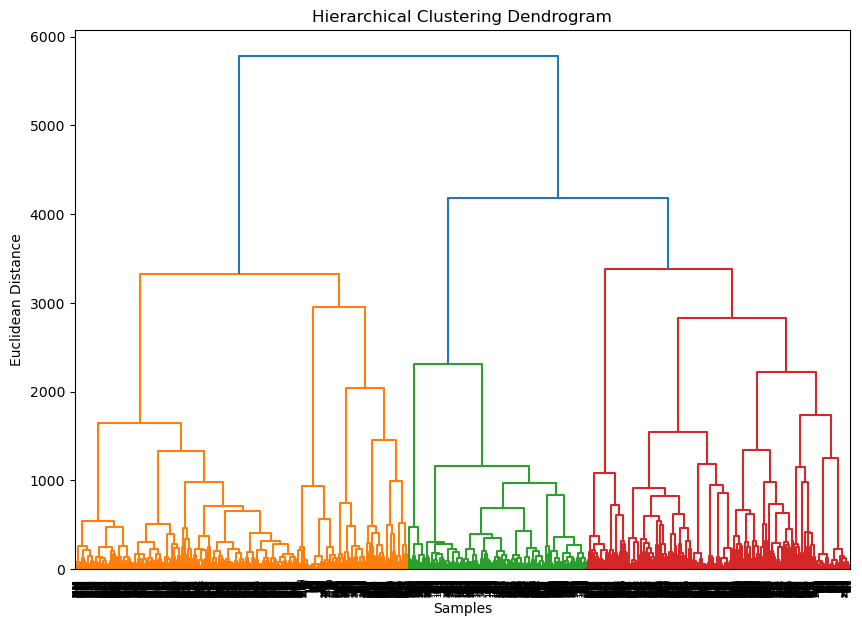

In [69]:
distance_matrix = hierarchy.linkage(reduced_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(distance_matrix, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

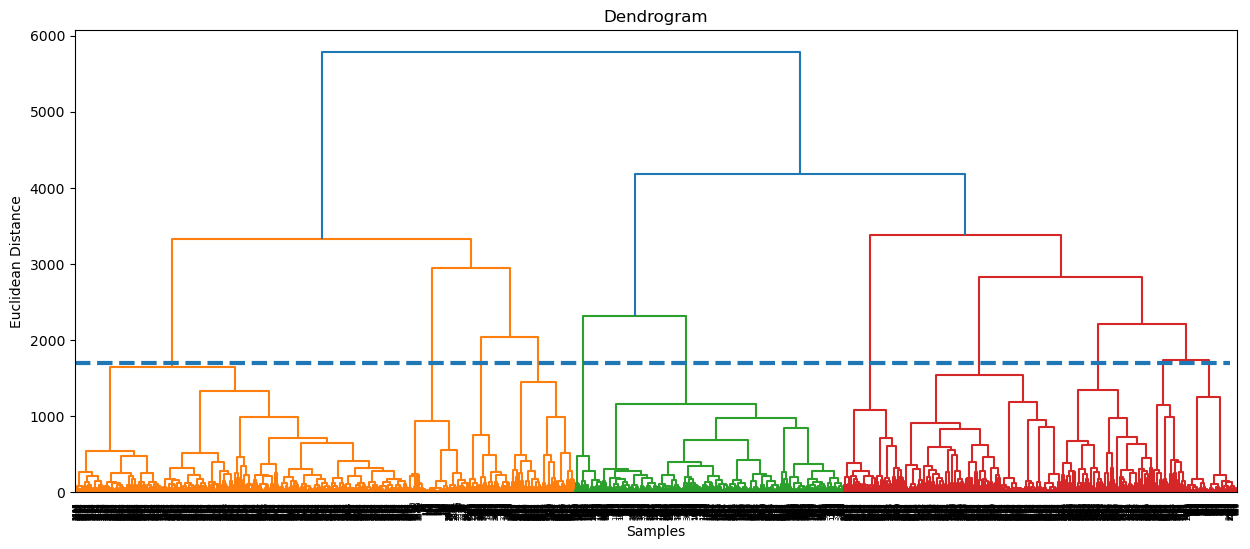

In [71]:
plt.figure(figsize=(15,6))

dendrogram = hierarchy.dendrogram(hierarchy.linkage(reduced_matrix, method = 'ward'))
plt.hlines(y=1700,xmin=0,xmax=40000,lw=3,linestyles='--')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [72]:
hc = AgglomerativeClustering(n_clusters = 11, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(reduced_matrix)

In [73]:
y_hc

array([5, 5, 5, ..., 0, 0, 0], dtype=int64)

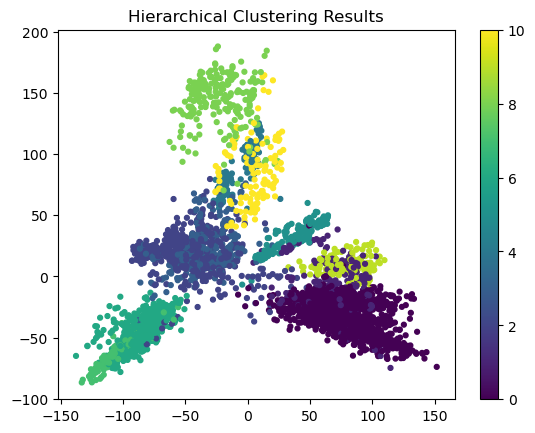

In [74]:
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=y_hc, s=12, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.colorbar()
plt.show()

### Visulisation of hierarchical clusters (using TSNE)

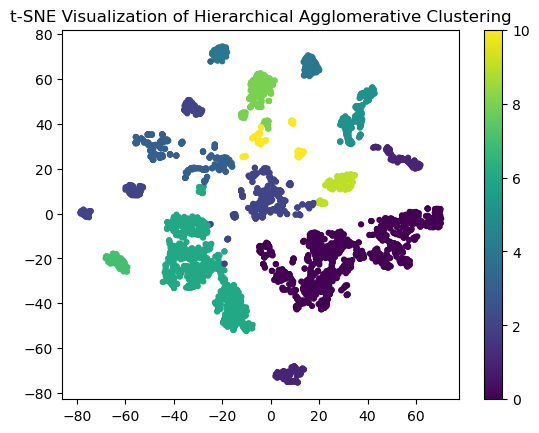

In [75]:
tsne = TSNE(n_components=2, random_state=42)

clustered_data_tsne = tsne.fit_transform(reduced_matrix)

plt.scatter(clustered_data_tsne[:, 0], clustered_data_tsne[:, 1], c=y_hc, s=12, cmap='viridis')
plt.title('t-SNE Visualization of Hierarchical Agglomerative Clustering')
plt.colorbar()
plt.show()

### Annotation of hierarchical clusters (using meta data) 'As I did in k-means'

In [81]:
n_clusters = 11
cluster_indices_hc = {i: [] for i in range(n_clusters)}

for idx, label in enumerate(y_hc):
    cluster_indices_hc[label].append(idx)

In [82]:
cluster_indices_hc

{0: [163,
  164,
  165,
  166,
  167,
  168,
  171,
  1270,
  1294,
  1296,
  1297,
  1299,
  1300,
  1301,
  1302,
  1303,
  1304,
  1305,
  1306,
  1307,
  1308,
  1309,
  1310,
  1311,
  1312,
  1313,
  1317,
  1318,
  1320,
  1327,
  1328,
  1329,
  1330,
  1331,
  1332,
  1333,
  1334,
  1335,
  1336,
  1337,
  1338,
  1339,
  1340,
  1341,
  1342,
  1343,
  1344,
  1345,
  1346,
  1348,
  1349,
  1350,
  1351,
  1352,
  1353,
  1354,
  1355,
  1358,
  1359,
  1360,
  1375,
  1376,
  1377,
  1378,
  1379,
  1380,
  1381,
  1382,
  1383,
  1384,
  1385,
  1386,
  1387,
  1388,
  1389,
  1390,
  1391,
  1392,
  1393,
  1394,
  1395,
  1396,
  1397,
  1398,
  1399,
  1400,
  1401,
  1402,
  1403,
  1404,
  1405,
  1406,
  1407,
  1408,
  1409,
  1410,
  1411,
  1412,
  1413,
  1414,
  1415,
  1416,
  1417,
  1418,
  1419,
  1420,
  1421,
  1422,
  1423,
  1424,
  1425,
  1426,
  1427,
  1428,
  1429,
  1430,
  1431,
  1432,
  1433,
  1434,
  1435,
  1436,
  1437,
  1438,
  1439,
  14

In [83]:
annotated_clusters_hc = { i: [] for i in range(n_clusters) }

In [84]:
for key in meta_groups.keys():
    for i in range(n_clusters):
        if set(meta_groups[key]).issubset(set(cluster_indices_hc[i])):
            annotated_clusters_hc[i] += [key]
        else:
            freq = 0
            for j in meta_groups[key]:
                if j in cluster_indices_hc[i]:
                    freq += 1
            if freq > 0.6 * len(meta_groups[key]):
                annotated_clusters_hc[i] += [key]

In [85]:
for cluster, label in annotated_clusters_hc.items():
    print("The names of tissues/cells/cell_lines in the cluster number {0} are {1}".format(cluster, label), '\n')

The names of tissues/cells/cell_lines in the cluster number 0 are ['CD4+ T-cell', 'CD8+ T-cell', 'NK cell', 'Activated CD3+ T-cell', 'Activated CD8+ T-cell', 'Activated CD4+ T-cell', 'CD3+ T-cell', 'T-cell leukemia', 'Fetal thymus'] 

The names of tissues/cells/cell_lines in the cluster number 1 are ['Myeloid progenitor', 'Myeloid leukemia', 'CD19+ B-cell', 'Myeloma cell line', 'B-cell lymphoma', 'CD20+ B-cell', 'Lymphoblastoid cell line'] 

The names of tissues/cells/cell_lines in the cluster number 2 are ['Digestive', 'Thyroid gland', 'Pancreas', 'Heart', 'Adrenal gland', 'Ovary', 'Lung', 'Fetal muscle', 'Fetal heart', 'Fetal kidney'] 

The names of tissues/cells/cell_lines in the cluster number 3 are ['Lung cancer cell line', 'Pluripotent/Pluripotent-derived', 'Neuroblastoma/Retinoblastoma', 'Fetal eye'] 

The names of tissues/cells/cell_lines in the cluster number 4 are ['MCF-7', 'T47D'] 

The names of tissues/cells/cell_lines in the cluster number 5 are ['Myeloid leukemia (K562)']

### Silhouette score of both models

In [87]:
silhouette_avg_kmeans = silhouette_score(reduced_matrix, comb_cluster_labels)
silhouette_avg_hc = silhouette_score(reduced_matrix, y_hc)
print("Silhouette score of K-means clustering model is: ", silhouette_avg_kmeans)
print("Silhouette score of hierarchical clustering model is: ", silhouette_avg_hc)

Silhouette score of K-means clustering model is:  0.38444315648201477
Silhouette score of hierarchical clustering model is:  0.3739839691819992


### Silhouette score per-sample of both models and number of problematic samples

In [90]:
sample_silhouette_scores = silhouette_samples(reduced_matrix, comb_cluster_labels)
problematic_samples = reduced_matrix[sample_silhouette_scores < 0.2]
print('number of problematic samples which have a silhouette score < 0.2 after a combination of k-means clustering and hierarchical subclustering is: ',
      len(problematic_samples))
sample_silhouette_scores = silhouette_samples(reduced_matrix, y_hc)
problematic_samples = reduced_matrix[sample_silhouette_scores < 0.2]
print('number of problematic samples which have a silhouette score < 0.2 after hierarchical clustering is: ',
      len(problematic_samples))

number of problematic samples which have a silhouette score < 0.2 after a combination of k-means clustering and hierarchical subclustering is:  780
number of problematic samples which have a silhouette score < 0.2 after hierarchical clustering is:  938


## The End Of The Notebook